## Import the libraries

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Understanding the data set we will be working with

In [132]:
df = pd.read_csv("data/bank-additional.csv",sep = ';')

In [133]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Numeric and categorical value analysis

In [134]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [136]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [137]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome','y']

In [138]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


From the results of ``describe()``, there might be need of scaling for some of the features. For example ``age`` has a mean of 40.11, ranging from 18 to 88 whereas ``euribor3m``has a mean of 3 and it ranges from 0.63 to 5.04. Data scaling is beneficial for models like __Logistic Regression__, __K-nearest Neighbours__ and __Neural Networks__.

In [139]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


No missing values in the data set.

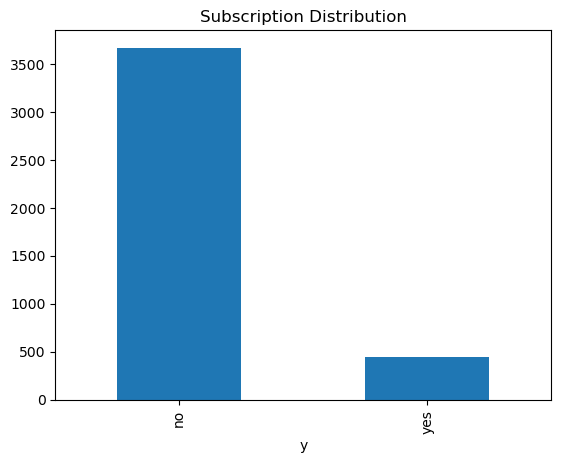

In [140]:
# Target variable distribution
df['y'].value_counts().plot(kind='bar', title='Subscription Distribution')
plt.show()

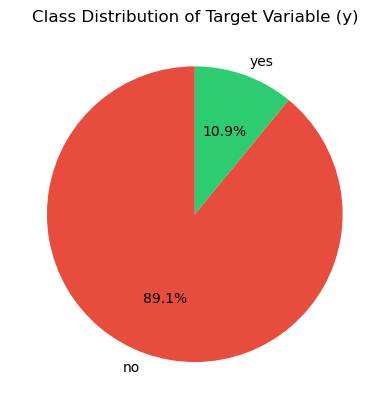

In [141]:
# Class Imbalance Visualization
df['y'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#E74C3C', '#2ECC71'])
plt.title('Class Distribution of Target Variable (y)')
plt.ylabel('')  # Hide the y-label
plt.show()

We can see that there is a clear imbalancy in the target variable. We should handle this before training our model.

In [142]:
# Filter the DataFrame to include only clients who said 'yes'
clients_yes = df[df['y'] == 'yes']

# Now, clients_yes contains only the records of clients who subscribed to a term deposit

In [143]:
clients_yes.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,41.889135,560.787140,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625
std,13.292977,411.537717,1.370175,413.150869,1.003841,1.638610,0.689219,5.933069,1.769719,90.607987
min,18.000000,63.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,31.000000,255.500000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,0.846000,5008.700000
50%,39.000000,458.000000,2.000000,999.000000,0.000000,-1.800000,93.369000,-40.300000,1.262000,5076.200000
75%,51.000000,761.000000,2.500000,999.000000,1.000000,1.100000,93.994000,-36.100000,4.855000,5191.000000
max,86.000000,3643.000000,11.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,4.970000,5228.100000


In [144]:
clients_yes.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,451,451,451,451,451,451,451,451,451,451,451
unique,12,4,7,2,3,3,2,10,5,3,1
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,yes
freq,133,252,165,402,240,374,375,90,98,292,451


In [145]:
clients_no = df[df['y'] == 'no']

In [146]:
clients_no.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000
mean,39.895311,219.409760,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
std,9.865468,198.256347,2.670831,125.928646,0.429446,1.481298,0.561238,4.395060,1.640054,65.906049
min,18.000000,0.000000,1.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,96.000000,1.000000,999.000000,0.000000,-1.800000,93.200000,-42.700000,1.405000,5099.100000
50%,38.000000,165.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,274.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,88.000000,3253.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [147]:
clients_no.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668
unique,12,4,8,3,3,3,2,10,5,3,1
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,879,2257,1099,2913,1935,2975,2277,1288,764,3231,3668


There is a significant difference between the means of ``euribor3m`` for the clients who said no and the clients who said yes. When the ``euribor3m`` is lower, the clients are more likely to say "yes".

### Histogram

__For numerical features__

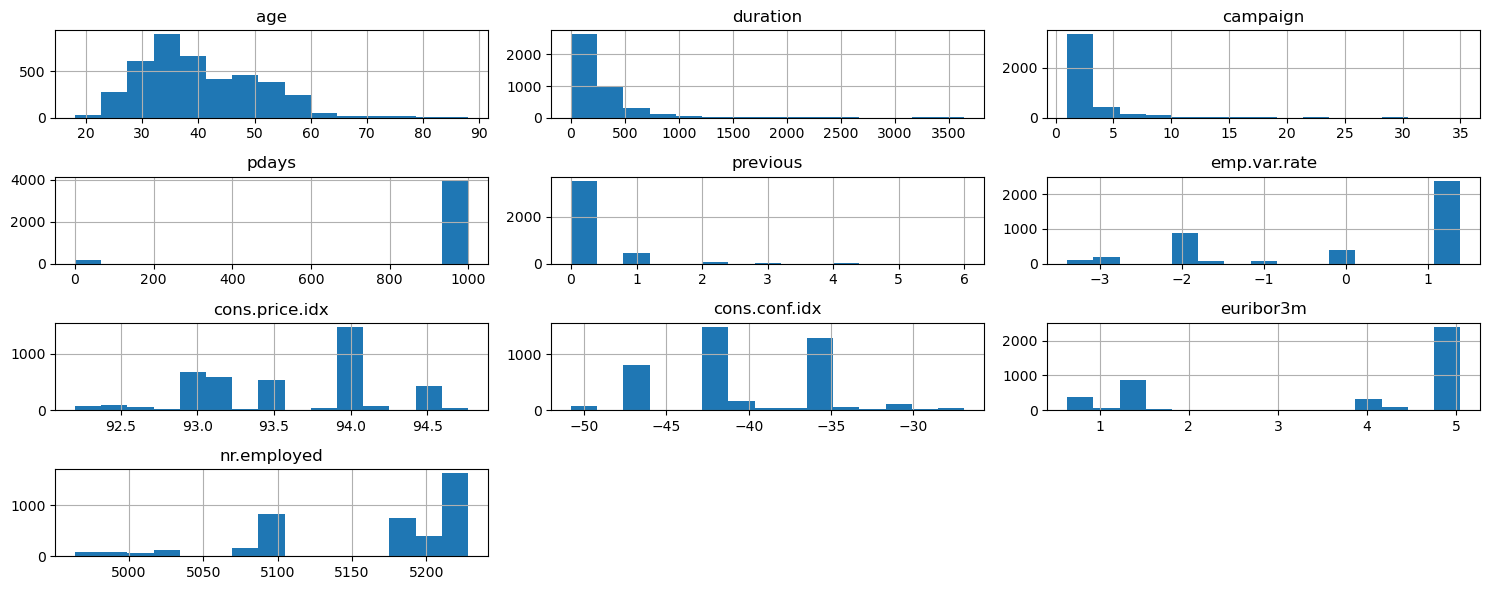

In [148]:
# List of numerical columns to plot
# numerical_cols = ['age', 'campaign', 'pdays', 'previous']

# Plot histograms
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(4, 3))
plt.tight_layout()
plt.show()

__For categorical features__

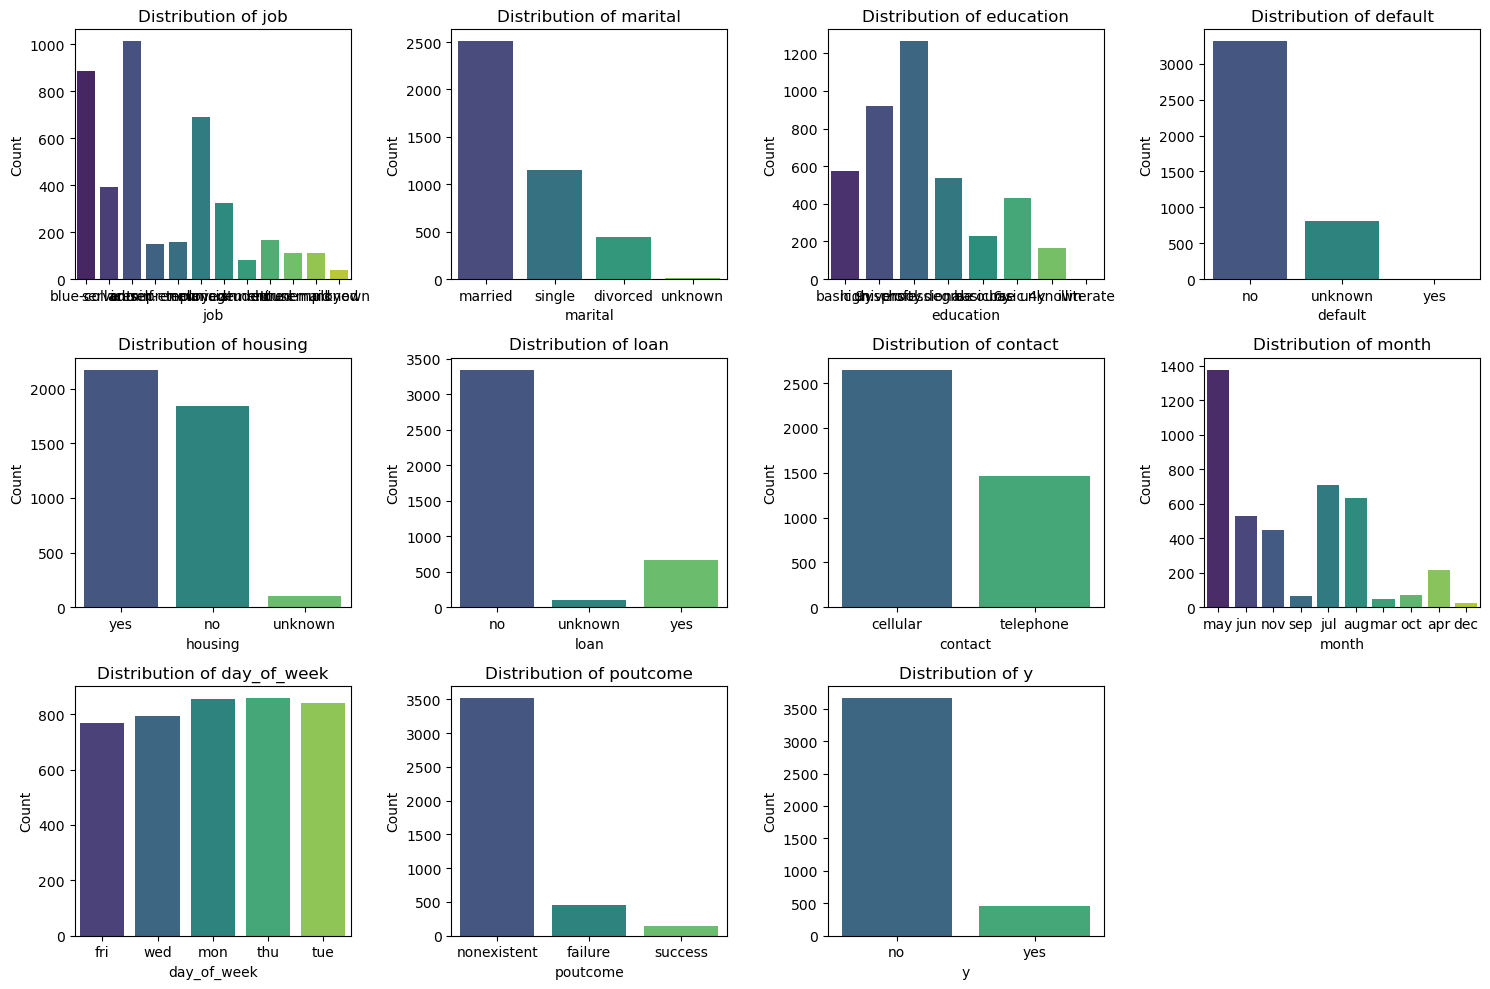

In [149]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each categorical feature and create a bar chart
for i, feature in enumerate(categorical_cols):
    plt.subplot(3, 4, i+1)  # 3 rows, 4 columns layout
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Boxplot

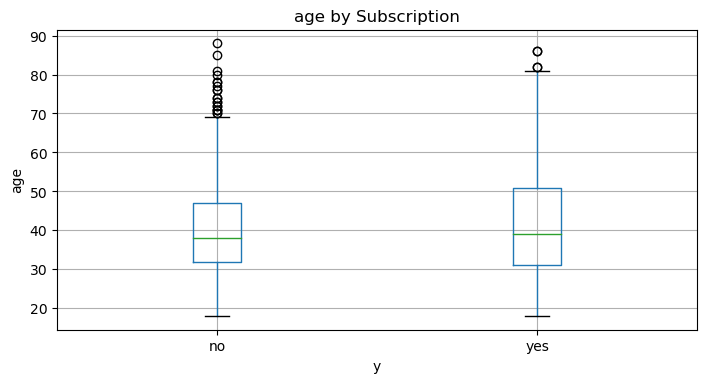

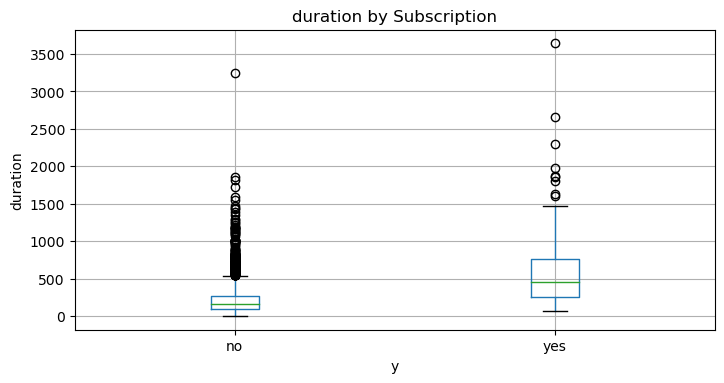

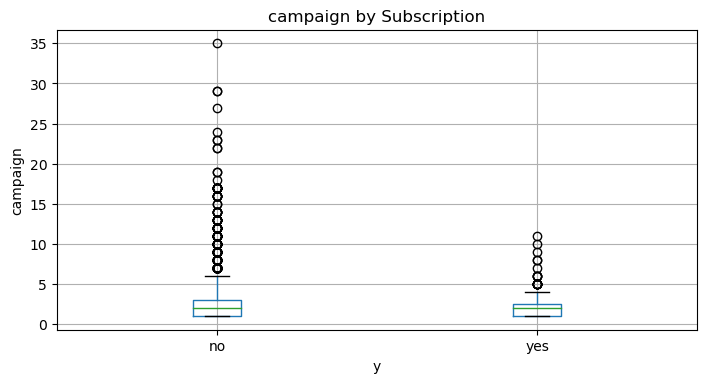

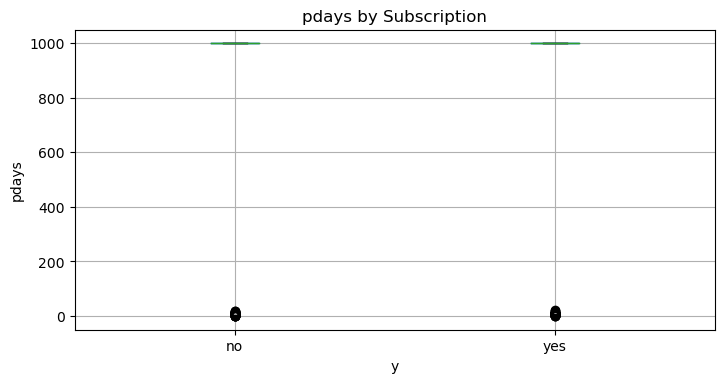

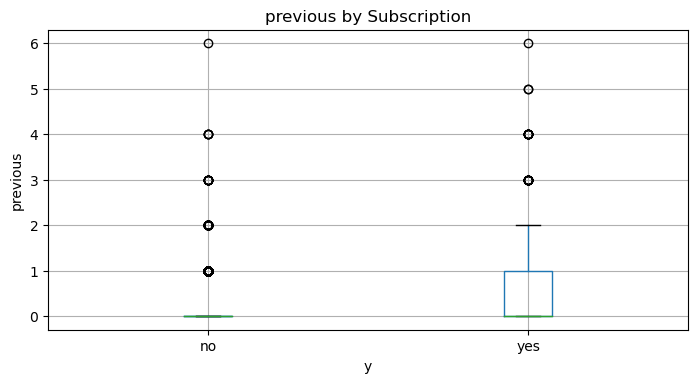

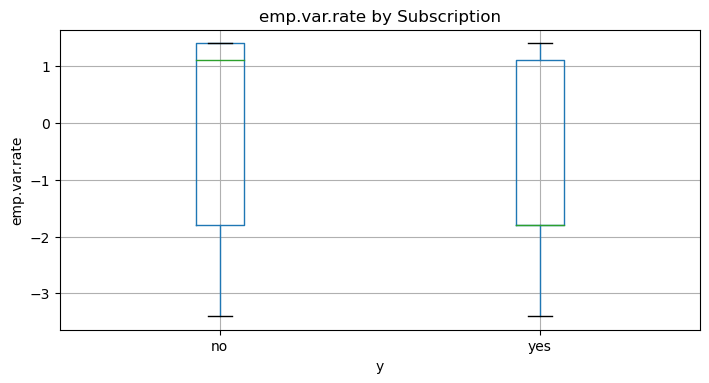

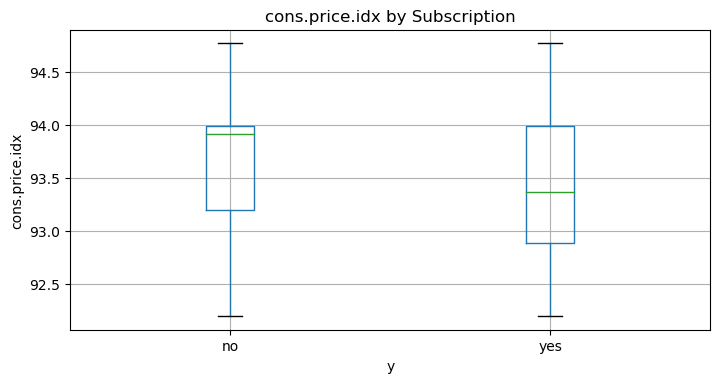

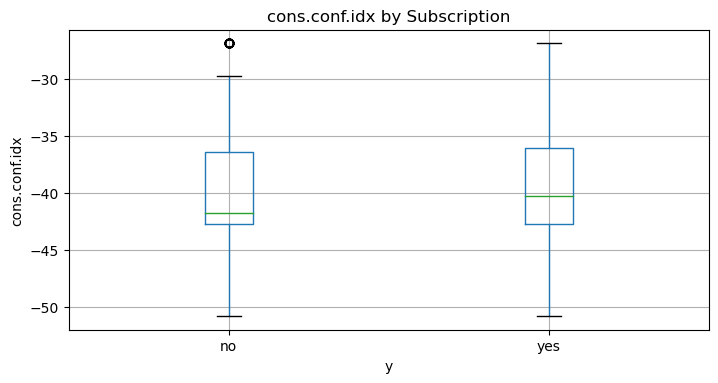

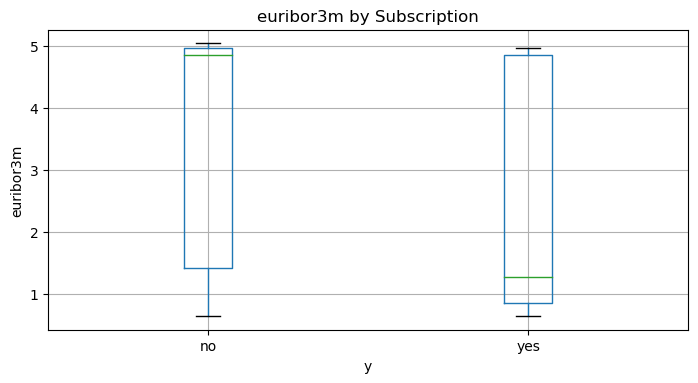

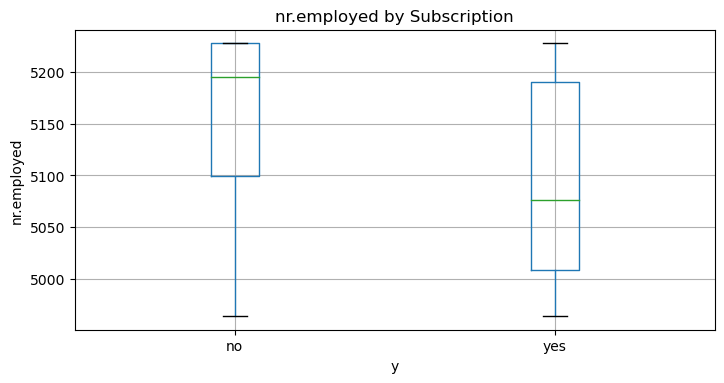

In [150]:
# Boxplots for numeric features by target variable
for col in numerical_cols:
    df.boxplot(column=col, by='y', figsize=(8, 4))
    plt.title(f"{col} by Subscription")
    plt.suptitle('')  # That's to remove the default 'Boxplot grouped by y' title
    plt.ylabel(col)
    plt.show()

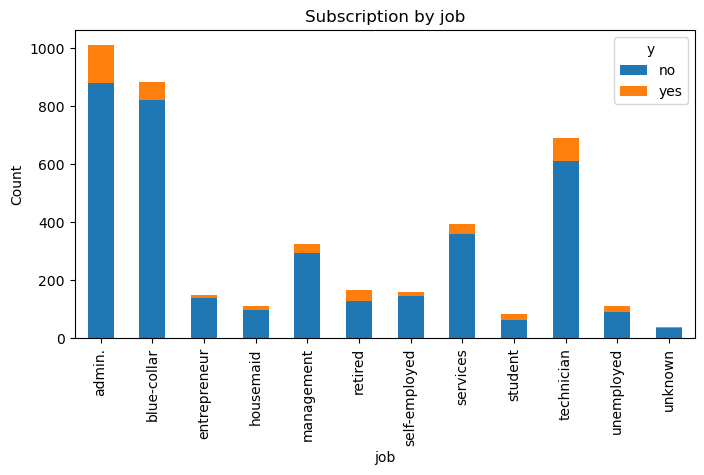

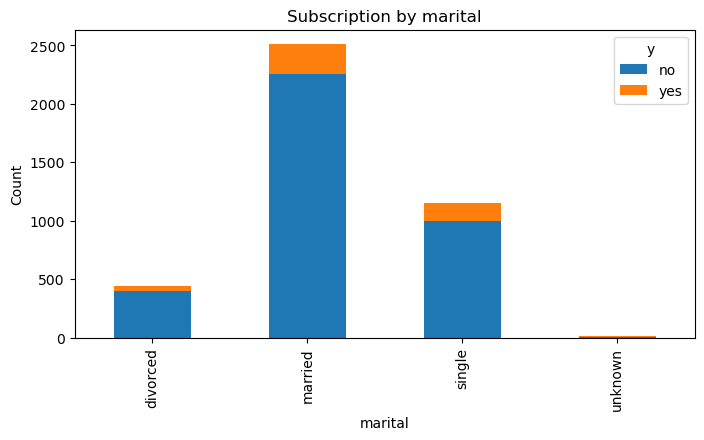

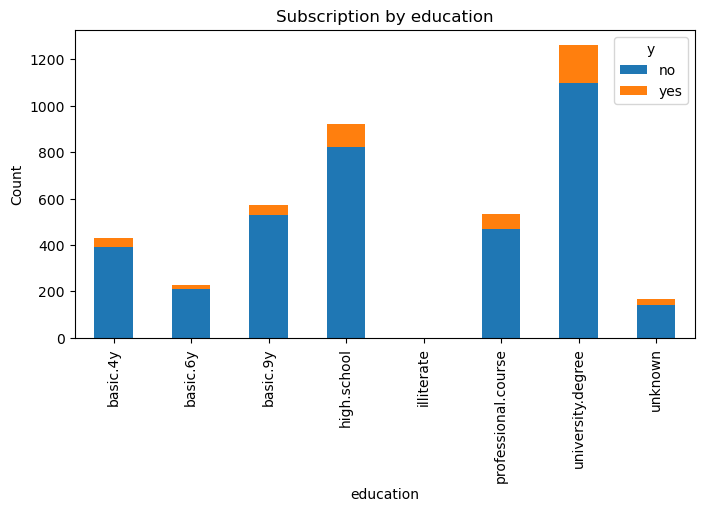

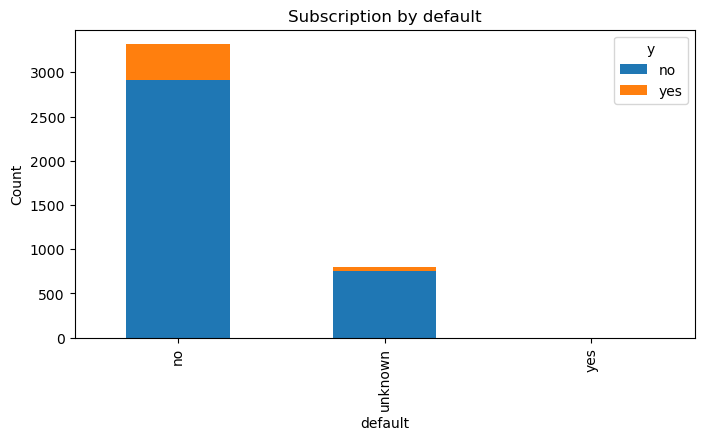

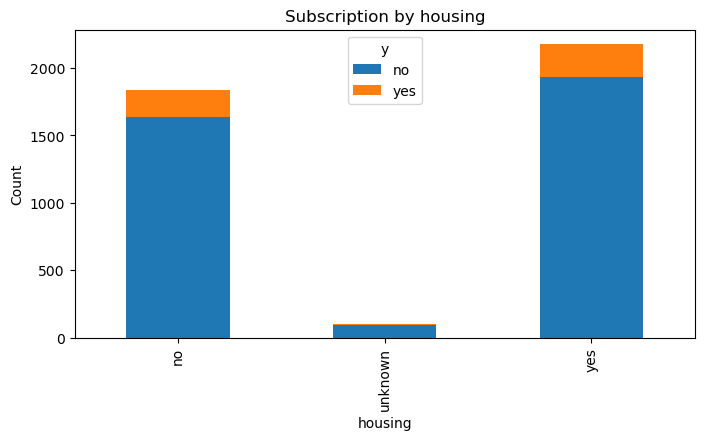

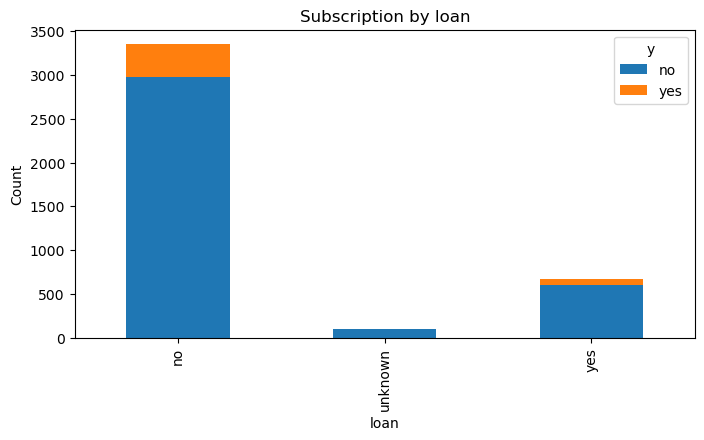

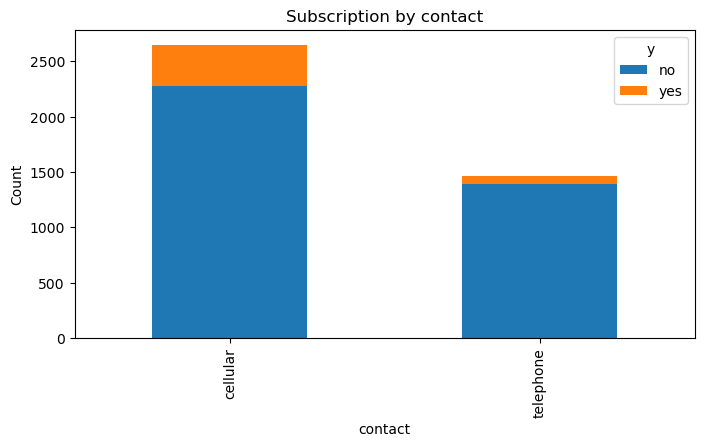

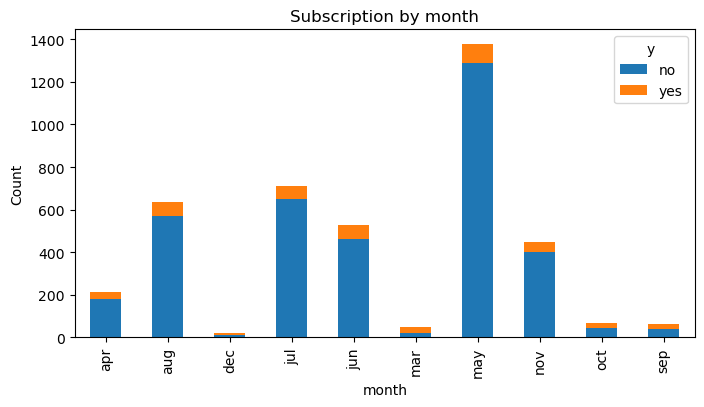

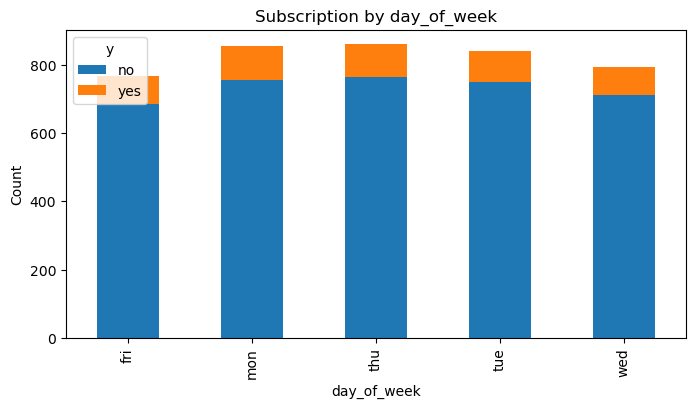

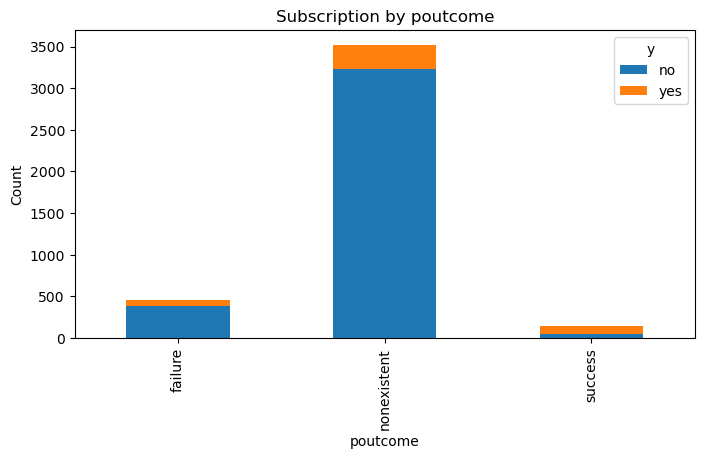

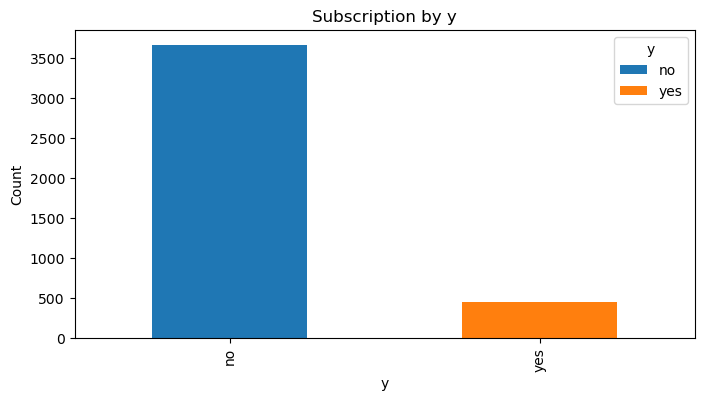

In [151]:
# Bar charts for key categorical features
for col in categorical_cols:
    pd.crosstab(df[col], df['y']).plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f"Subscription by {col}")
    plt.ylabel('Count')
    plt.show()

In [152]:
# First, select only the numeric columns of the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Now, you can safely calculate the correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


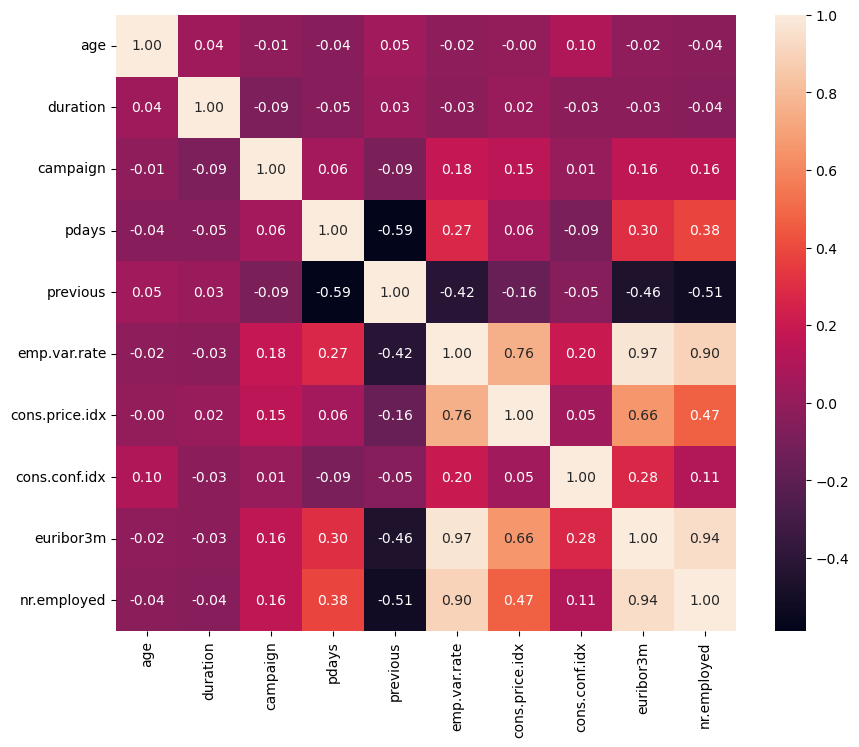

In [153]:
# Heatmap for the numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [154]:
df['pdays'] = df['pdays'].replace(999, -1)  # Or use a central tendency measure

Encoding the categorical variables to be able to include them in the heatmap

In [155]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome', 'y']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Now df has all categorical columns label encoded

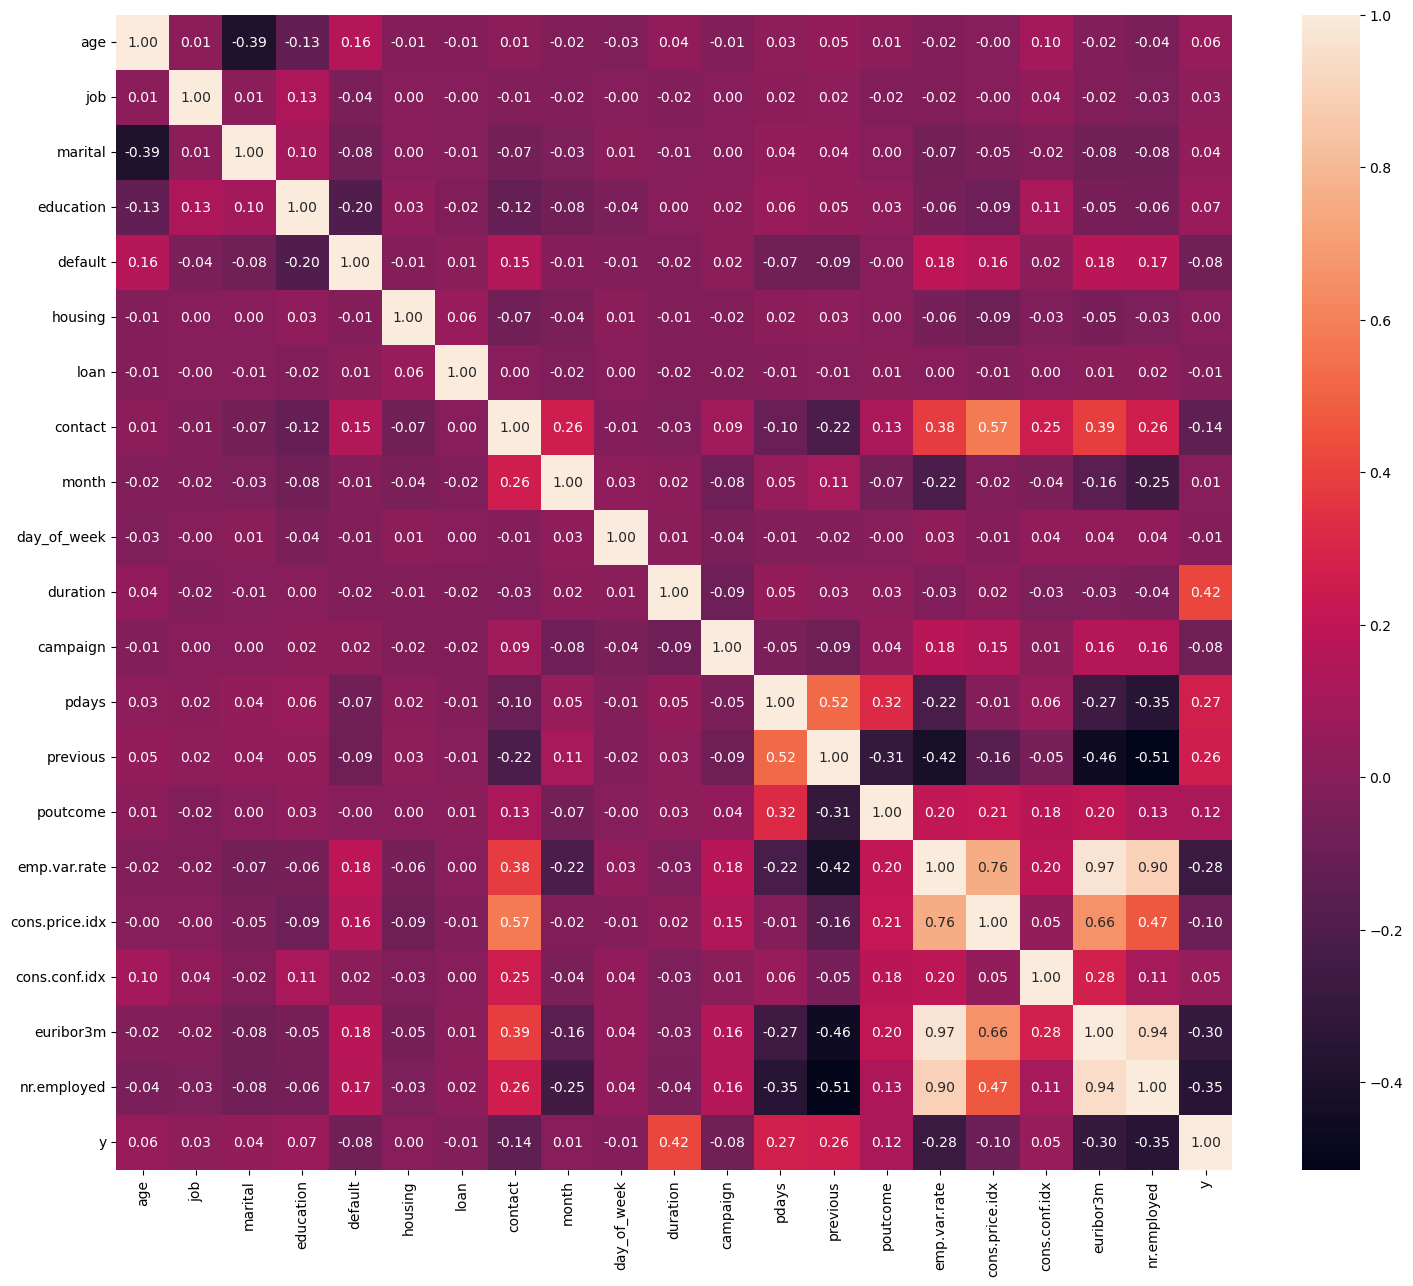

In [156]:
# Heatmap for the numeric features
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

## Feature Engineering and Data Preprocessing

In [157]:
df = pd.read_csv("data/bank-additional.csv",sep = ';')

Dropping ``duration`` to have a realistic predictive model as it highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.

In [158]:
df = df.drop('duration', axis=1)

In [159]:
# create 'previous_contact'
df['previous_contact'] = (df['pdays'] != 999).astype(int) 
df.loc[df["previous_contact"]==False, "pdays"] = -1

# create 'unemployed'
df["unemployed"] = df["job"].isin(["student", "retired", "unemployed"]).astype(int)

In [160]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome']

In [161]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Now df has all categorical columns label encoded

In [162]:
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler

df_majority = df[df.y == 'no']  # or 0 if your target is binary encoded
df_minority = df[df.y == 'yes']  # or 1 if your target is binary encoded

# First, oversample the minority class to a less extent
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=int(len(df_majority) * 0.5),  # Oversample to 50% of the majority class
                                   random_state=123)

df_majority_undersampled = resample(df_majority, 
                                   replace=True,
                                   n_samples=int(len(df_majority) * 0.5),  # Undersample to 50% of the majority class
                                   random_state=123)
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

### Standard Scaler

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df_oversampled.drop('y', axis=1)  # Assuming 'y' is the target column
y = df_oversampled['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiate and train the model with class_weight set to 'balanced'

model = LogisticRegression(max_iter=6000, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.7493188010899182
              precision    recall  f1-score   support

          no       0.80      0.83      0.82       739
         yes       0.63      0.58      0.60       362

    accuracy                           0.75      1101
   macro avg       0.72      0.71      0.71      1101
weighted avg       0.74      0.75      0.75      1101



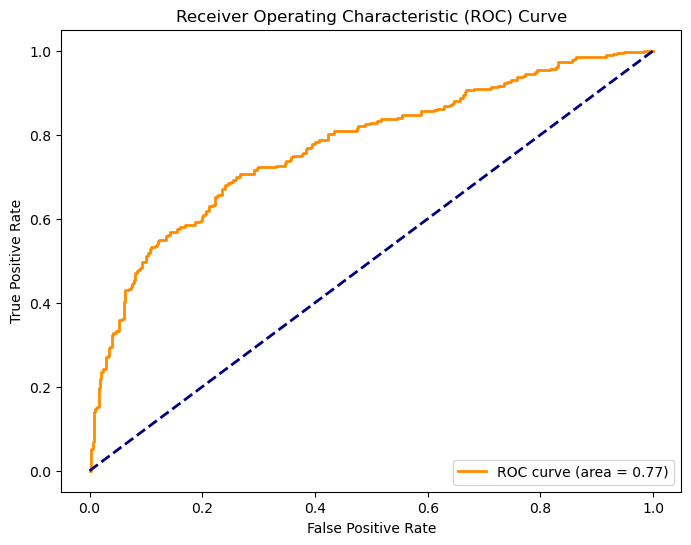

In [165]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and rf_clf is the trained Random Forest classifier

# Convert the target variable to binary format
y_test_binary = (y_test == 'yes').astype(int)  # Convert 'yes' to 1 and 'no' to 0

# Get the probability predictions for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve, specifying the positive label
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs, pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test_binary, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the Random Forest model
# Note: 'class_weight' is set to 'balanced' to handle the class imbalance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
r = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, r))
print(classification_report(y_test, r))

Accuracy: 0.9564032697547684
              precision    recall  f1-score   support

          no       0.99      0.95      0.97       739
         yes       0.90      0.98      0.94       362

    accuracy                           0.96      1101
   macro avg       0.94      0.96      0.95      1101
weighted avg       0.96      0.96      0.96      1101



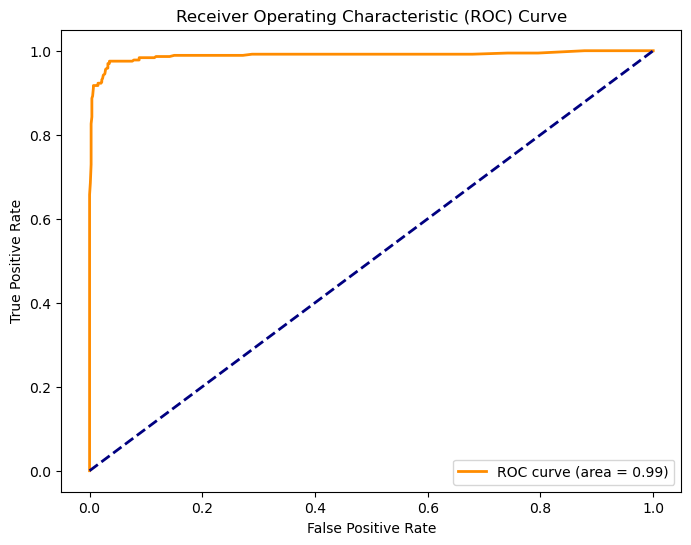

In [167]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and rf_clf is the trained Random Forest classifier

# Convert the target variable to binary format
y_test_binary = (y_test == 'yes').astype(int)  # Convert 'yes' to 1 and 'no' to 0

# Get the probability predictions for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve, specifying the positive label
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs, pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test_binary, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Neural Networks

In [168]:
from sklearn.neural_network import MLPClassifier

# Instantiate and train the neural network model
# Here we'll just start with one hidden layer with 100 neurons
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions and evaluate the model
nn_predictions = nn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, nn_predictions))
print(classification_report(y_test, nn_predictions))

Accuracy: 0.7947320617620345
              precision    recall  f1-score   support

          no       0.81      0.91      0.86       739
         yes       0.76      0.55      0.64       362

    accuracy                           0.79      1101
   macro avg       0.78      0.73      0.75      1101
weighted avg       0.79      0.79      0.78      1101



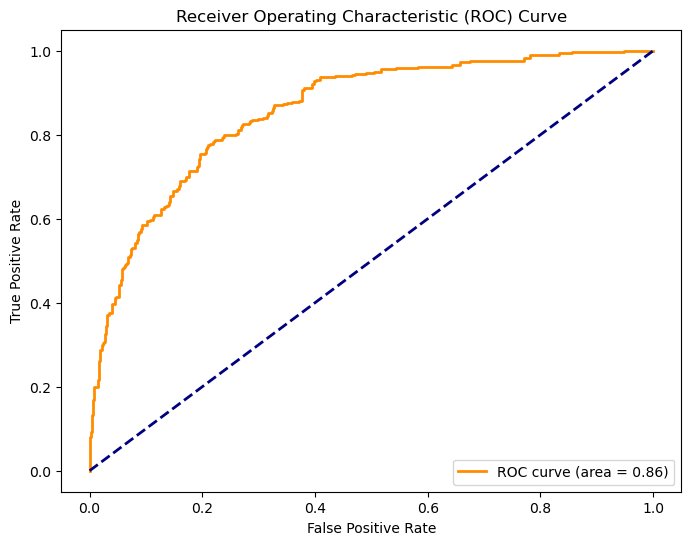

In [169]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and rf_clf is the trained Random Forest classifier

# Convert the target variable to binary format
y_test_binary = (y_test == 'yes').astype(int)  # Convert 'yes' to 1 and 'no' to 0

# Get the probability predictions for the positive class
y_probs = nn_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve, specifying the positive label
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs, pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test_binary, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Custom Label Encoder and Features Adder classes for Pipeline

In [170]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [171]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns):
        self.categorical_columns = categorical_columns
        self.encoders = None
    
    def fit(self, X, y=None):
        self.encoders = {
            col: LabelEncoder().fit(X[col].astype(str))
            for col in self.categorical_columns
        }
        print("Fitting Label Encoders")
        return self
    
    def transform(self, X, y=None):
        X_new = X.copy()
        for col, le in self.encoders.items():
            original_classes = list(le.classes_)
            X_new[col] = X_new[col].map(lambda s: 'unknown' if s not in le.classes_ else s).astype(str)
            le.classes_ = np.append(le.classes_, 'unknown')
            X_new[col] = le.transform(X_new[col])
        return X_new

In [172]:
class CustomFeaturesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        print("Fitting Custom Features Adder")
        return self
    
    def transform(self, X, y=None):
        X_new = X.copy()
        X_new['previous_contact'] = (X_new['pdays'] != 999).astype(int)
        X_new.loc[X_new["previous_contact"] == 0, "pdays"] = -1
        X_new["unemployed"] = X_new["job"].isin(["student", "retired", "unemployed"]).astype(int)
        
        return X_new

### Hyperparameter Tuning using GridSearchCV

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    # Add more parameters here if you want
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'), 
                           param_grid=param_grid, 
                           cv=5,  # Number of folds in cross-validation
                           verbose=2,  # Controls the verbosity: the higher, the more messages
                           n_jobs=-1)  # Number of jobs to run in parallel

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:\n", grid_search.best_params_)

# Predict with the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the best model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters:
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9545867393278837
              precision    recall  f1-score   support

          no       0.99      0.94      0.97       739
         yes       0.90      0.98      0.93       362

    accuracy                           0.95      1101
   macro avg       0.94      0.96      0.95      1101
weighted avg       0.96      0.95      0.96      1101



### Finalize the selected model by encapsulating with Pipeline

In [174]:
df = pd.read_csv("data/bank-additional.csv",sep = ';')

In [175]:
df = df.drop('duration', axis=1)

In [176]:
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler

df_majority = df[df.y == 'no']  # or 0 if your target is binary encoded
df_minority = df[df.y == 'yes']  # or 1 if your target is binary encoded

# First, oversample the minority class to a less extent
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=int(len(df_majority) * 0.5),  # Oversample to 50% of the majority class
                                   random_state=123)

df_majority_undersampled = resample(df_majority, 
                                   replace=True,
                                   n_samples=int(len(df_majority) * 0.5),  # Undersample to 50% of the majority class
                                   random_state=123)
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Define the pipeline with custom feature addition, label encoding, and scaling
pipeline_rf = Pipeline([
    ('feature_adder', CustomFeaturesAdder()),
    ('label_encoder', CustomLabelEncoder(categorical_columns=categorical_columns)),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Define hyperparameter grid for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt']
}

# Instantiate GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, verbose=2, n_jobs=-1)

# Separate features and target variable
X = df_oversampled.drop('y', axis=1)
y = df_oversampled['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters for Random Forest:\n", grid_search_rf.best_params_)

# Predict with the best model
best_rf_model = grid_search_rf.best_estimator_
predictions_rf = best_rf_model.predict(X_test)

# Evaluate the best model
print("Accuracy:", accuracy_score(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting Custom Features Adder
Fitting Label Encoders
Best hyperparameters for Random Forest:
 {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Accuracy: 0.9591280653950953
              precision    recall  f1-score   support

          no       0.99      0.95      0.97       739
         yes       0.91      0.98      0.94       362

    accuracy                           0.96      1101
   macro avg       0.95      0.96      0.95      1101
weighted avg       0.96      0.96      0.96      1101



### Feature Importance

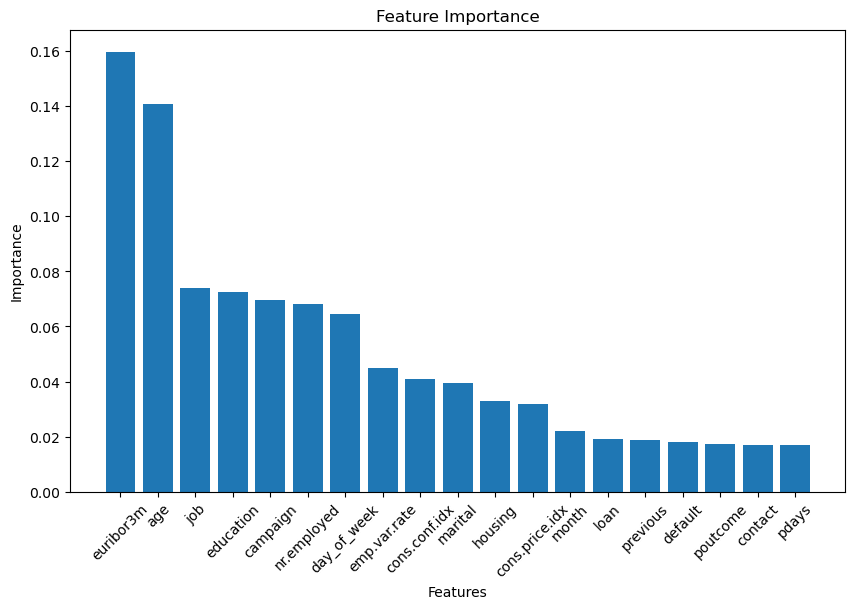

In [178]:
# Access the trained RandomForestClassifier from the pipeline
rf_model = best_rf_model.named_steps['classifier']

# Now, use the feature_importances_ attribute from the RandomForestClassifier
importances = rf_model.feature_importances_

# The rest of your code for mapping, sorting, and visualizing importances remains the same

# Map these importances to the corresponding feature names
feature_names = X_train.columns
feature_importances = dict(zip(feature_names, importances))

# Sort the feature importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Visualize
plt.figure(figsize=(10,6))
plt.bar(range(len(sorted_importances)), [val[1] for val in sorted_importances], align='center')
plt.xticks(range(len(sorted_importances)), [val[0] for val in sorted_importances])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Saving the model using ``pickle``

In [179]:
import pickle

filename = 'bank_marketing_prediction.sav'
pickle.dump(best_rf_model, open(filename,'wb')) 

In [6]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

numpy==1.26.2
scikit-learn==1.3.0
matplotlib==3.5.2
pandas==2.0.3
seaborn==0.13.0
